In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

%load_ext autoreload
%autoreload 2

os.chdir('/content/drive/MyDrive/PR202010770/Lab03')

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import matplotlib.pyplot as plt

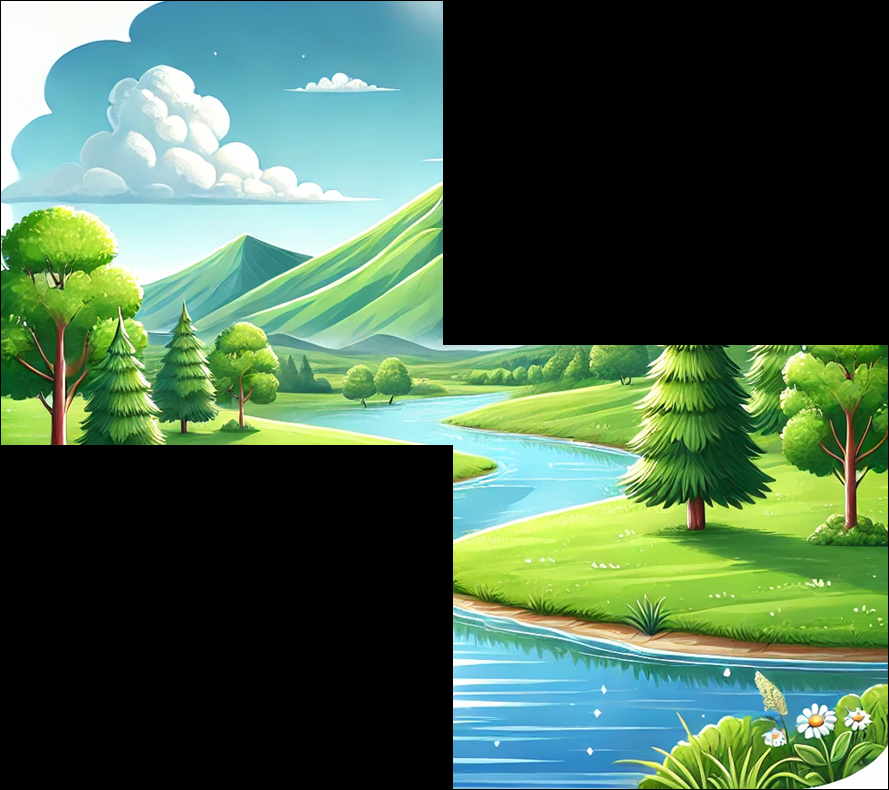

In [ ]:
background = cv2.imread('image/puzzle.png')
cv2_imshow(background)

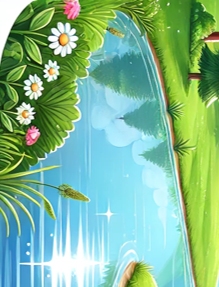

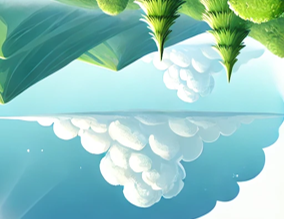

In [ ]:
puzzle1 = cv2.imread('image/puzzle_1.png')
cv2_imshow(puzzle1)
puzzle2 = cv2.imread('image/puzzle_2.png')
cv2_imshow(puzzle2)

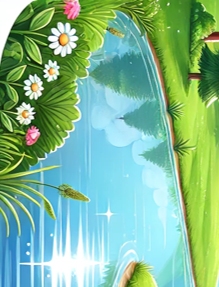

==== AFTER Geometric Transformation ====
[[ 6.123234e-17  1.000000e+00  0.000000e+00]
 [-1.000000e+00  6.123234e-17  2.180000e+02]]


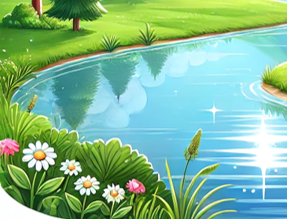

In [ ]:
img = puzzle1
cv2_imshow(img)

## img.shape[0]과 img.shape[1]이 헷갈릴 경우 미리 변수로 정하고 사용 가능합니다.
height = img.shape[0]
width = img.shape[1]

d90 = 90.0 * np.pi / 180

# 동차 행렬을 이용한 기하 변환

M1 = np.array([[np.cos(d90), np.sin(d90), 0], ## 90도 회전
               [-1* np.sin(d90), np.cos(d90), 0],
               [0, 0, 1]], dtype=np.float32)


M2 = np.array([[1, 0, 0],
               [0, 1, width-1],
               [0, 0, 1]], dtype=np.float32)


my_M = np.matmul( M2, M1) ## 회전(M1) 먼저 하고 이동 (M2)
my_M = my_M[0:2, :]  ## 함수에 입력으로 들어가도록 크기 맞추기


print('==== AFTER Geometric Transformation ====')
print(my_M)
my_result_1 = cv2.warpAffine(img, my_M, (height, width))    ## 이미지, 계산된 행렬, 표기할 이미지 크기(가로 길이, 세로 길이)
cv2_imshow(my_result_1)

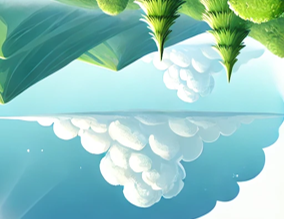

==== AFTER Geometric Transformation ====
[[  1.   0.   0.]
 [  0.  -1. 218.]]


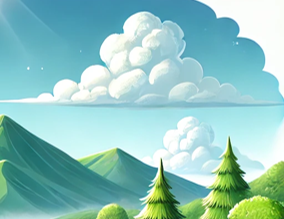

In [ ]:
img = puzzle2
cv2_imshow(img)

height = img.shape[0]
width = img.shape[1]
d180 = 180.0 * np.pi / 180

# 동차 행렬을 이용한 기하 변환
M1 = np.array([[1, 0, 0],
               [0, -1,0 ],
               [0, 0, 1]], dtype=np.float32)

M2 = np.array([[1.6, 0, 0],
               [0, 1.6, height-1],
               [0, 0, 1]], dtype=np.float32)


my_M = np.matmul( M2, M1 )
my_M = my_M[0:2, :]


print('==== AFTER Geometric Transformation ====')
print(my_M)
my_result_2 = cv2.warpAffine(img, my_M, (width, height))    ## 이미지, 계산된 행렬, 표기할 이미지 크기(가로 길이, 세로 길이)
cv2_imshow(my_result_2)

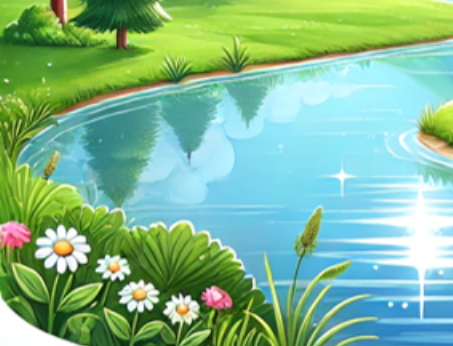

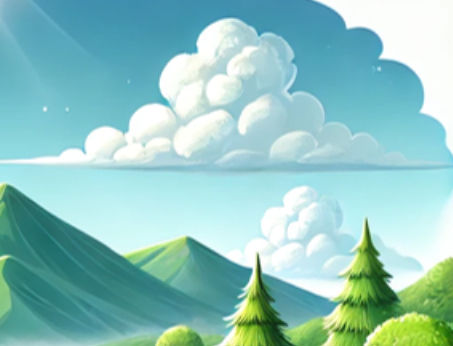

In [ ]:
up_scaling = np.array( [[1.6, 0, 0 ],
               [0, 1.6, 0 ]], dtype=np.float32)

re_width = int (my_result_1.shape[1] * 1.58)
re_height = int (my_result_1.shape[0] * 1.58)

puzzle_1_result = cv2.warpAffine(my_result_1, up_scaling, (re_width, re_height))
puzzle_2_result = cv2.warpAffine(my_result_2, up_scaling, (re_width, re_height))
cv2_imshow(puzzle_1_result)
cv2_imshow(puzzle_2_result)

In [ ]:
## 배경 이미지 위에 물체 이미지를 올리는 코드
## background_img : 배경 이미지
## object_img : 물체 이미지
## x_offset : 물체를 위치할 X 좌표 (x 좌측 끝 점)
## y_offset : 물체를 위치할 Y 좌표 (y 위쪽 끝 점)
def insert_img(background_img, object_img, x_offset, y_offset):

  x_end = x_offset + object_img.shape[1]  ## x 우측 끝 점
  y_end = y_offset + object_img.shape[0]  ## y 아래쪽 끝 점

  output_img = np.copy(background_img)    ## 출력 이미지

  for idxy, y in enumerate(range(y_offset,y_end)):
    for idxx, x in enumerate(range(x_offset,x_end)):
      if sum(object_img[idxy, idxx]) == 0:    ## 만약 물체 이미지 값이 검은색일 경우
        output_img[y,x] = background_img[y,x]   ## 배경 이미지 값 넣기
      else:
        output_img[y,x] = object_img[idxy, idxx]    ## 아닐 경우 물체 이미지 값 넣기

  return output_img

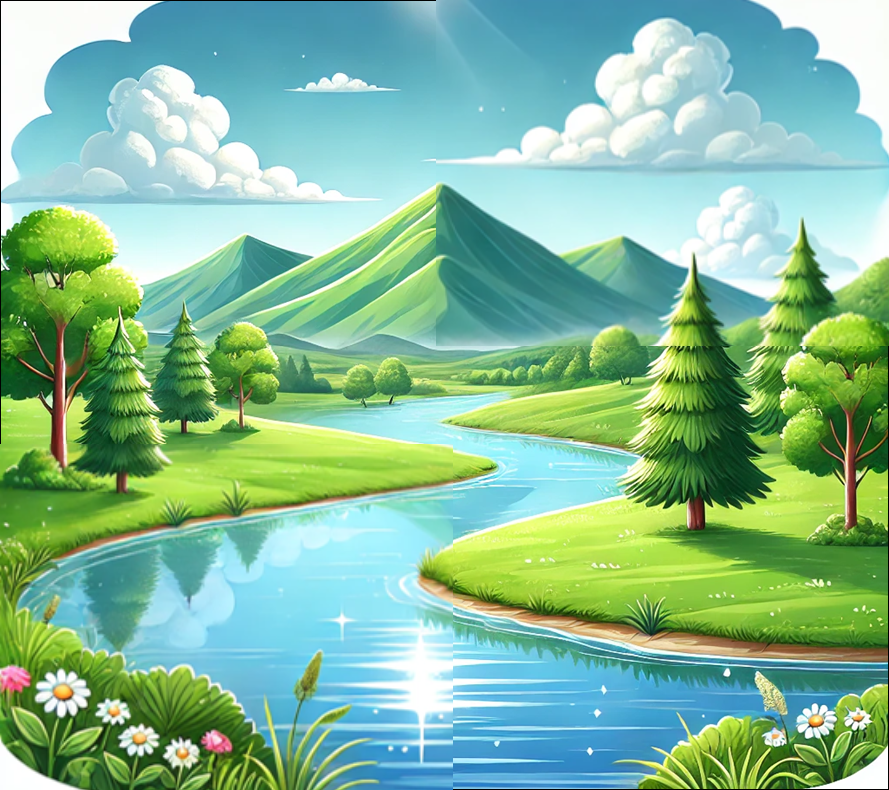

In [ ]:
puzzleinsert = insert_img(background, puzzle_1_result, 0, background.shape[0] - puzzle_1_result.shape[0])
puzzleinsert = insert_img(puzzleinsert, puzzle_2_result, background.shape[1] - puzzle_2_result.shape[1], 0)
cv2_imshow(puzzleinsert)

In [ ]:
!jupyter nbconvert --to html "Lab03_202010770.ipynb"

[NbConvertApp] Converting notebook Lab03_202010770.ipynb to html
[NbConvertApp] Writing 4353481 bytes to Lab03_202010770.html
